# Preprocessing Data
Herjanto janawisuta

1301200421

IF4408

Missing Value

In [ ]:
#Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Read Dataset audit_risk

url_1 = 'https://raw.githubusercontent.com/Herjantoj/audit_data/main/audit_risk.csv'
audit_risk = pd.read_csv(url_1)
# audit_risk.describe()
audit_risk

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [ ]:
# Read Dataset trial

url_2 = 'https://raw.githubusercontent.com/Herjantoj/audit_data/main/trial.csv'
trial = pd.read_csv(url_2)
# trial.describe()
trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


# Preprocessing Data

## Merge Dataset

In [ ]:
#Rename atribut pada dataset trial

trial.rename(columns = {'SCORE_A':'Score_A'}, inplace = True)
trial.rename(columns = {'SCORE_B':'Score_B'}, inplace = True)
trial.rename(columns = {'Risk':'Risk_Trial'}, inplace = True)

In [ ]:
#Membagi atribut Score_A dan Score_B dengan 10

trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

In [ ]:
#Mencari kolom audit_risk yang sama dengan kolom trial

same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [ ]:
#Menggabung dua dataset

df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_Trial'],
      dtype='object')

In [ ]:
# Cek Missing Value

df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
Risk_Trial        0
dtype: int64

In [ ]:
# Mengganti missing value dengan nilai rata2 pada atribut Monet_Value

df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
Risk_Trial        0
dtype: int64

In [ ]:
#Atribut 'Detection_Risk' dan 'Risk_F' memiliki value yang sama sepanjang baris, sehingga bisa di drop saja

df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   Risk_A         810 non-null    float64
 5   PARA_B         810 non-null    float64
 6   Score_B        810 non-null    float64
 7   Risk_B         810 non-null    float64
 8   TOTAL          810 non-null    float64
 9   numbers        810 non-null    float64
 10  Score_B.1      810 non-null    float64
 11  Risk_C         810 non-null    float64
 12  Money_Value    810 non-null    float64
 13  Score_MV       810 non-null    float64
 14  Risk_D         810 non-null    float64
 15  District_Loss  810 non-null    int64  
 16  PROB           810 non-null    float64
 17  RiSk_E         810 non-null    float64
 18  History   

In [ ]:
# Membuat value "LOCATION_ID" menjadi unique

df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
# Print total value pada "LOCATION_ID" yang non-numerik

print("Total value pada LOCATION_ID yang non-numerik: ", len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] ==  'NUH') | (df["LOCATION_ID"] == 'SAFIDON')]))

Total value pada LOCATION_ID yang non-numerik:  3


In [ ]:
# Menghapus baris yang terdapat value non-numerik

df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Jumlah baris : ",len(df))

Jumlah baris :  807


In [ ]:
# Menghapus value yang duplikat

df = df.drop_duplicates(keep = 'first')
print("Jumlah baris : ",len(df))

Jumlah baris :  760


In [ ]:
# Menghitung outlier

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * df)) | (df > (Q3 + 1.5 * IQR))).sum()

Sector_score       0
LOCATION_ID       94
PARA_A           245
Score_A            0
Risk_A           244
PARA_B           132
Score_B            0
Risk_B           139
TOTAL            251
numbers           70
Score_B.1         70
Risk_C            70
Money_Value      114
Score_MV           0
Risk_D           149
District_Loss    122
PROB              22
RiSk_E           138
History           50
Prob              50
Score              0
Inherent_Risk    132
CONTROL_RISK     173
Audit_Risk       126
Risk               0
Marks             70
MONEY_Marks        0
District         122
Loss              21
LOSS_SCORE        22
History_score     50
Risk_Trial         0
dtype: int64

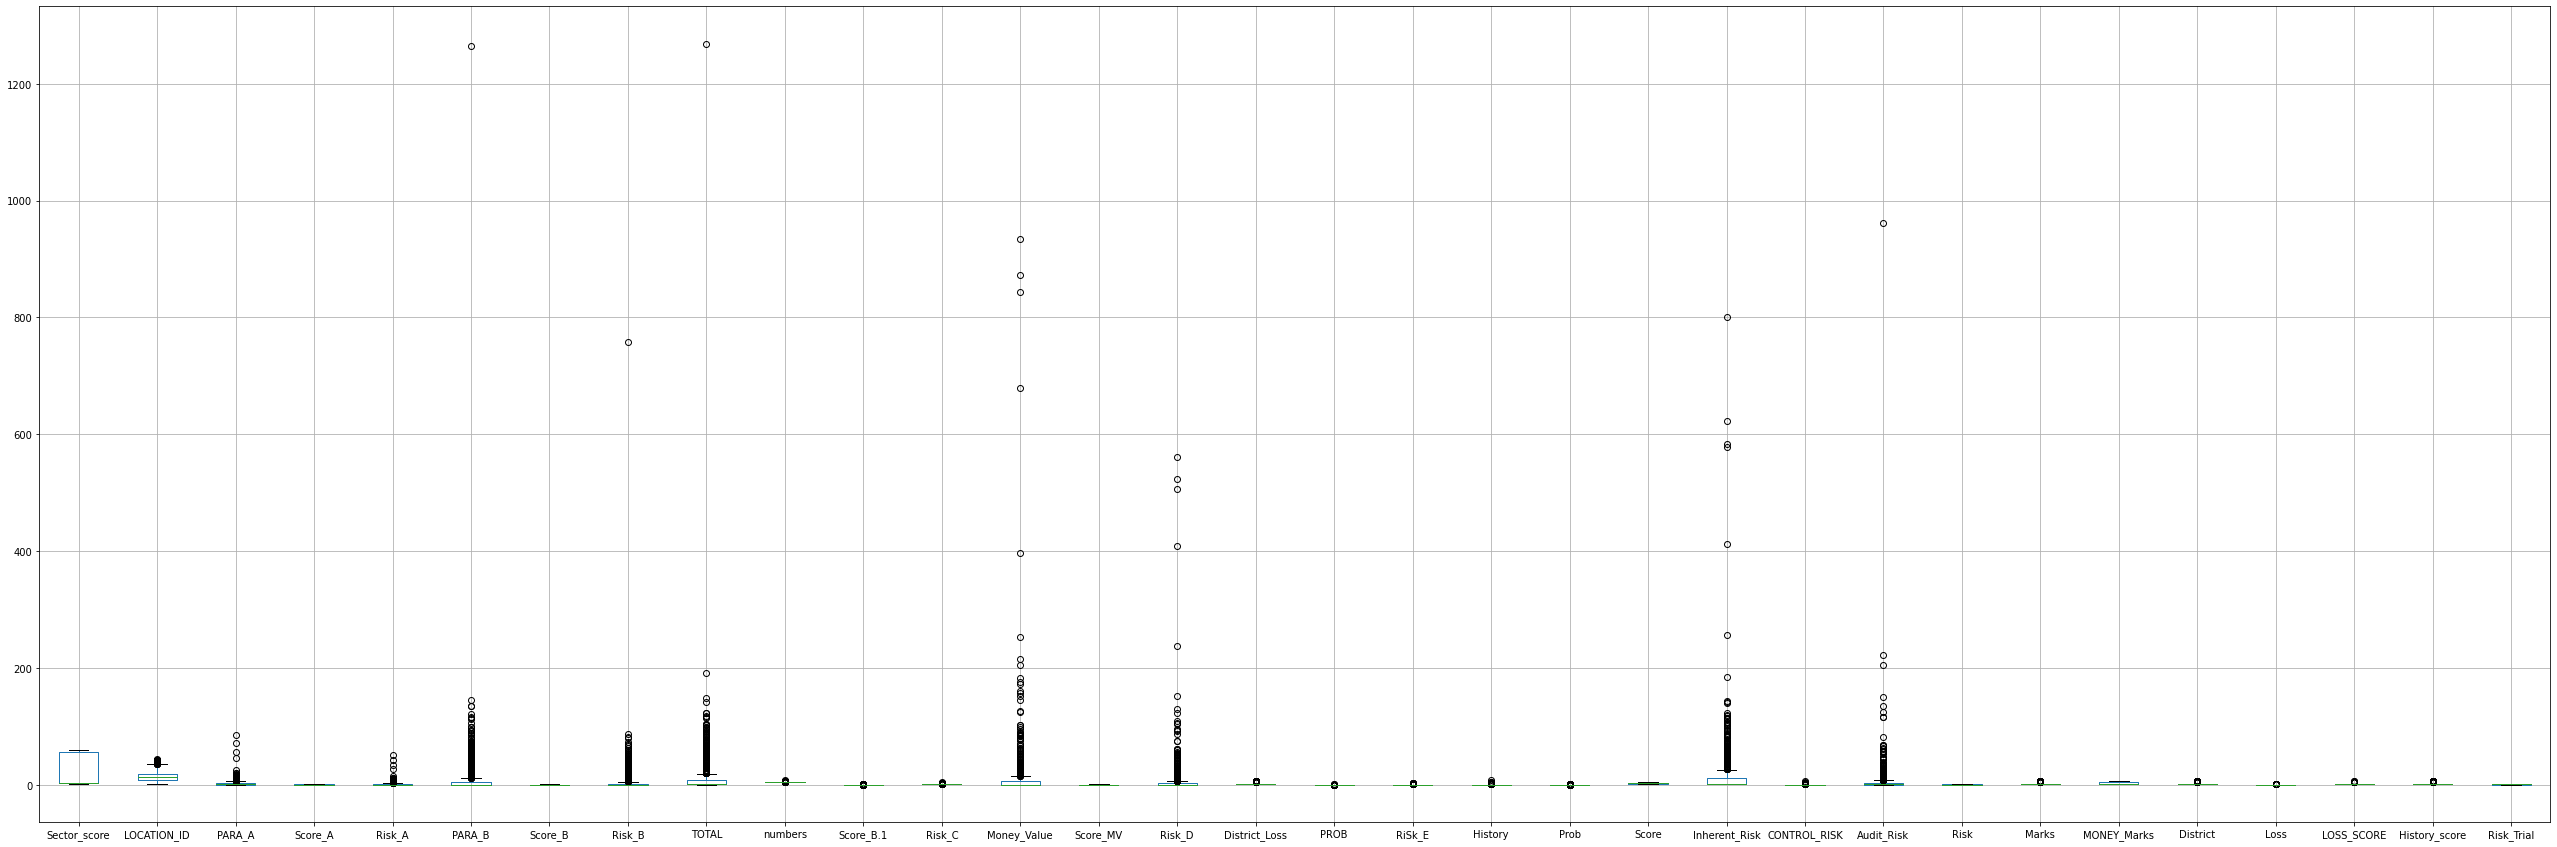

In [ ]:
#Boxplot

plt.figure(figsize=(45,15))
df.boxplot(column=['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks','District', 
       'Loss', 'LOSS_SCORE', 'History_score', 'Risk_Trial'])
plt.show()

# Classification

In [ ]:
# Menghapus atribut risk pada dataset sebagai bahan training dan test

classification_X = df.drop(["Risk"], axis = 1)
classification_y = df["Risk"]

In [ ]:
# Train-Test Split

X_train_org, X_test_org, y_train, y_test = train_test_split(classification_X, classification_y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

# ANN

In [ ]:
# activation function

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=31, input_dim=31),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 31)                992       
                                                                 
 dense_121 (Dense)           (None, 32)                1024      
                                                                 
 dense_122 (Dense)           (None, 32)                1056      
                                                                 
 dense_123 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3,105
Trainable params: 3,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 50, batch_size = 50)

Epoch 1/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9370 - accuracy: 0.6035
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6035
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6860
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7246
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6912
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6667
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.6789
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7211
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7684
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.8123
Epoch 11/50
12/12 [

In [ ]:
print("Evaluasi data ")
results = model.evaluate(X_test, y_test, batch_size=128)

Evaluasi data 
2/2 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


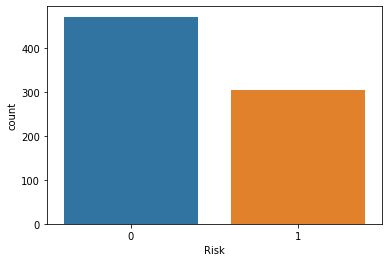

In [ ]:
sns.countplot(audit_risk['Risk'])